In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix

Content
There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit \
SEX: Gender (1=male, 2=female)\
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) \
MARRIAGE: Marital status (1=married, 2=single, 3=others)\
AGE: Age in years\
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)\
PAY_3: Repayment status in July, 2005 (scale same as above)\
PAY_4: Repayment status in June, 2005 (scale same as above)\
PAY_5: Repayment status in May, 2005 (scale same as above)\
PAY_6: Repayment status in April, 2005 (scale same as above)\
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)\
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)\
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)\
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)\
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)\
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)\
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)\
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)\
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)\
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)\
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)\
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)\
default.payment.next.month: Default payment (1=yes, 0=no)




In [10]:
df = pd.read_csv("/Users/dimitrijeadzic/Downloads/UCI_Credit_Card.csv")

In [44]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [65]:
#Renaming 'default.payment.next.month' to 'DEFAULT'
df.rename({'default.payment.next.month':'DEFAULT'},axis='columns',inplace=True)
df.rename({'default.payment.next.month':'DEFALUT'}, axis='columns', inplace=True)

In [13]:
#Dropping the 'ID' Column
df.drop('ID',axis=1,inplace=True)

In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [32]:
df.isnull().sum() 

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

# Missing data

Since we are going to use scikit-learn to perform SVM having missing data is detremental to the model. We have to see how much of missing data do we have and decide what to do with it.

In [48]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

Lets visually inspect the data

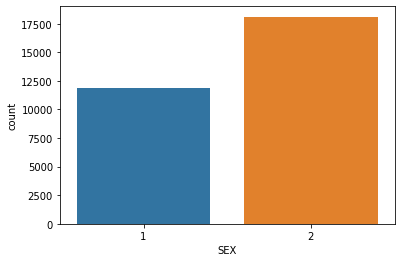

In [47]:
sns.countplot(x='SEX', data=df)
plt.show()
# 1 is male 2 is female

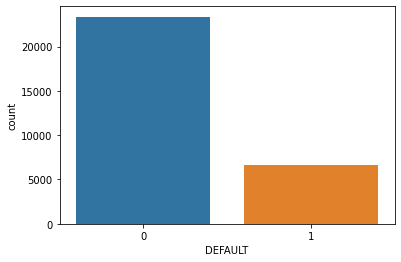

In [45]:
sns.countplot(x='DEFAULT', data=df)
plt.show()

In [54]:
default_yes = df[df['DEFAULT'] == 1] 
default_no = df[df['DEFAULT'] == 0]

#downsample default_yes data 6000
default_yes_down = resample(default_yes,
                            replace=False,
                            n_samples=6000,
                            random_state=50)

#downsample default_no data 6000
default_no_down = resample(default_no,
                            replace=False,
                            n_samples=6000,
                            random_state=50)

In [55]:
default_yes_down.shape

(6000, 24)

In [56]:
df_downsampled = pd.concat([default_yes_down, default_no_down])
df_downsampled.shape

(12000, 24)

In [59]:
X = df_downsampled.drop(['DEFAULT'], axis=1)
y = df_downsampled['DEFAULT']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)

In [61]:
column_transformer = make_column_transformer(
    (StandardScaler(), ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'AGE']),      
    (OneHotEncoder(), ['SEX']),
    remainder='passthrough')

In [62]:
pipe_svc = make_pipeline(column_transformer, SVC())
accuray = cross_val_score(pipe_svc, X_train, y_train, cv=5, scoring='accuracy').mean()

accuray

0.701875

In [63]:
pipe_svc.fit(X_train, y_train)
y_predict = pipe_svc.predict(X_test)

In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      1237
           1       0.78      0.60      0.68      1163

    accuracy                           0.72      2400
   macro avg       0.73      0.72      0.72      2400
weighted avg       0.73      0.72      0.72      2400

